In [1]:
import baltic as bt
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#Load Arha Data to color the tree
data = pd.read_csv('../data/ncbi_virus/arha_enriched.csv')

print(len(data['host_genus'].unique())) 

host_genus_dict = data.groupby("species")["host_genus"].first().to_dict()


56


Uropsilus
Urotrichus
Talpa
Scalopus
Suncus
Crocidura
Crocidura
Crocidura
Crocidura
Neomys
Neomys
Anourosorex
Sorex
Sorex
Sorex
Sorex
Sorex
Sorex
Sorex
Glis
Dryomys
Tamias
Meriones
Niviventer
Bandicota
Rattus
Rattus
Rattus
Rattus
Rattus
Rattus
Mus
Mus
Mastomys
Stenocephalemys
Hylomyscus
Hylomyscus
Apodemus
Apodemus
None
None
Apodemus
Apodemus
Lemmus
Microtus
Microtus
Microtus
Microtus
Microtus
Microtus
Microtus
Microtus
Microtus
Microtus
Myodes
Myodes
Myodes
Myodes
Eothenomys
Eothenomys
Caryomys
Tscherskia
Cricetulus
Reithrodontomys
Reithrodontomys
Reithrodontomys
Reithrodontomys
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Peromyscus
Sigmodon
Sigmodon
Oxymycterus
Oxymycterus
Oxymycterus
Necromys
Necromys
Akodon
Akodon
Akodon
Akodon
Akodon
Akodon
Thaptomys
Scapteromys
Abrothrix
Loxodontomys
Calomys
Calomys
Calomys
Calomys
Oligoryzomys
Oligoryzomys
Oligoryzomys
Oligoryzomys
Oligor

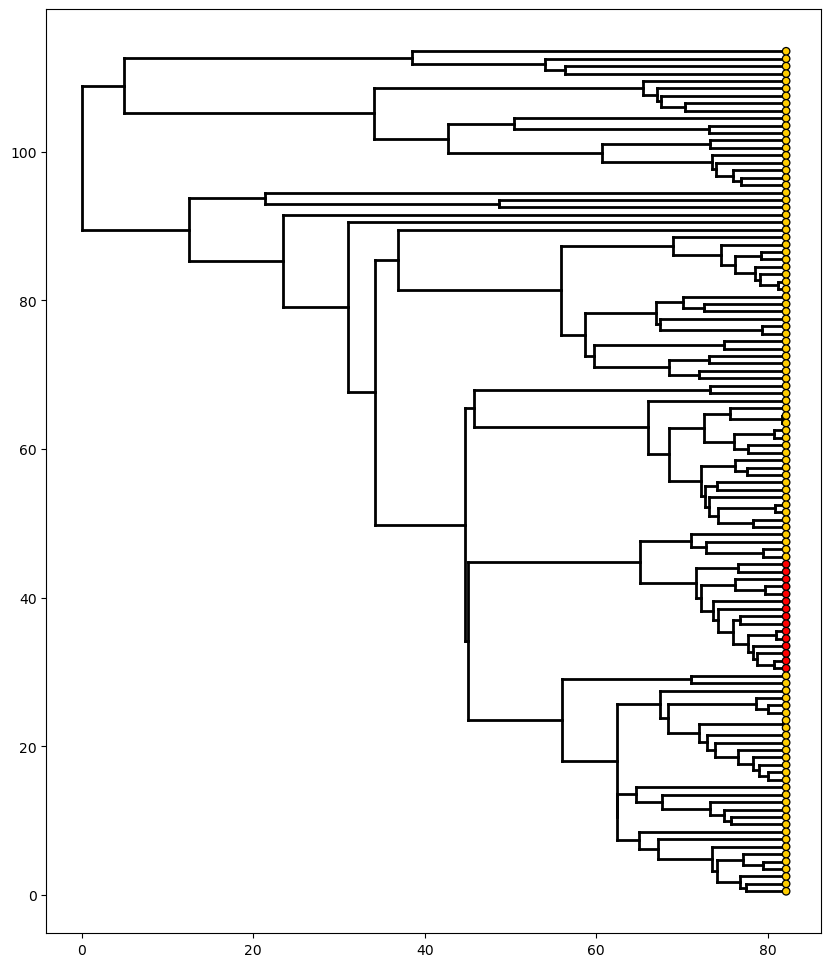

In [28]:
host_tree_path = '../data/ncbi_virus/uphamTree_hantaHosts.nwk'

host_tree = bt.loadNewick(host_tree_path)

for k in host_tree.Objects:
    if k.is_leaf():
        k.name = k.name.replace('_',' ')
        k.traits['genus'] = host_genus_dict.get(k.name, "Unknown")
        print(k.traits['genus'])

fig, ax = plt.subplots(figsize=(10,12), facecolor='w')

#Color function by genus
cmap = lambda k: 'red' if 'genus' in k.traits and k.traits['genus'] == 'Peromyscus' else '#FFCD00'

host_tree.plotTree(ax, colour='black')
host_tree.plotPoints(ax, colour=cmap, size=20, zorder=10)


plt.show()

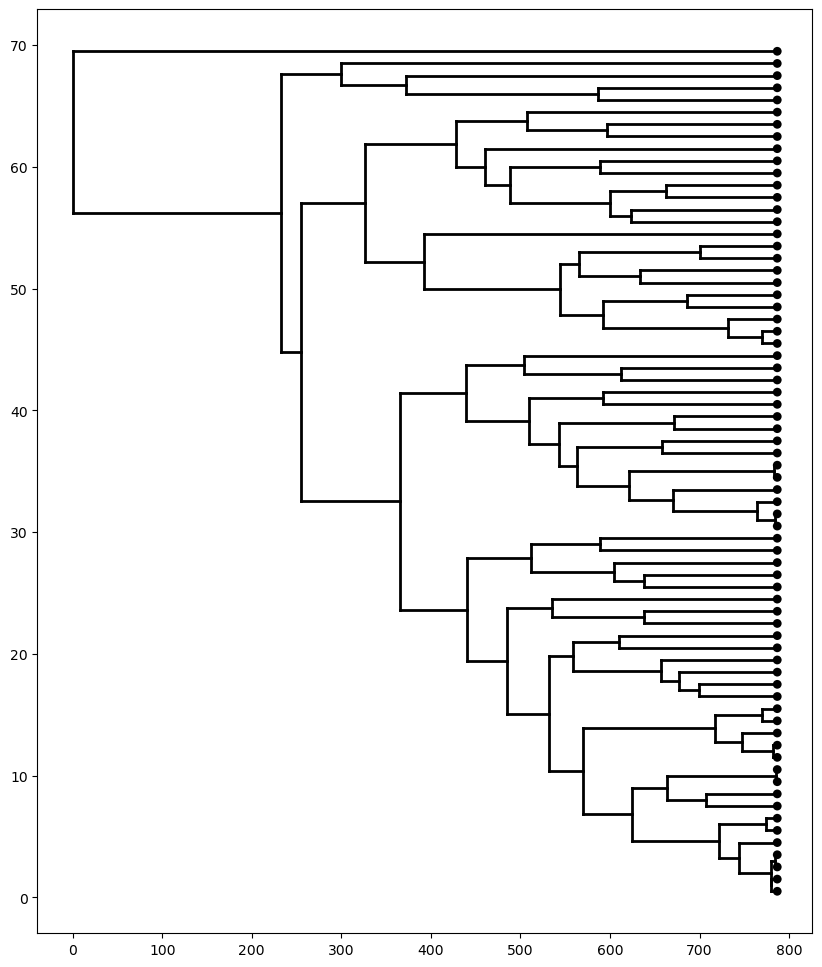

In [29]:
host_tree_path = '../data/ncbi_virus/Hanta_S-hanta_S_aligned.mcc.tree'

host_tree = bt.loadNewick(host_tree_path)

""" for k in host_tree.Objects:
    if k.is_leaf():
        k.name = k.name.replace('_',' ')
        k.traits['genus'] = host_genus_dict.get(k.name, "Unknown")
        print(k.traits['genus']) """

fig, ax = plt.subplots(figsize=(10,12), facecolor='w')

#Color function by genus
cmap = lambda k: 'red' if 'genus' in k.traits and k.traits['genus'] == 'Peromyscus' else '#FFCD00'

host_tree.plotTree(ax, colour='black')
host_tree.plotPoints(ax, colour='k', size=20, zorder=10)


plt.show()